Linear discriminant analysis(LDA)線性判別分析 are supervised classifier. It used in preprocessing, same as PCA, it use a new coordinate system, put the data into a lower dimension. The biggest difference is, LDA don't focus on covariance, instead it will optimize lower dimension to get the best class separability. Therefore, the new coordinate system in classification model are easier to find the decision boundary, therefore it is suitable to make classification pipeline. Also it can prevent overfitting, such as the curse of dimensionality.

Instead calculating covariance matrix, LDA calculate the characteristic value and characteristic vector of within class and between class scatter matrix.

1. calculate the mean vectors of each class
2. calculate the within class and between class scatter matrix.
3. calculate the Sw-1Sb characteristic value and characteristic vector.
4. Descending order the characteristic value, keep the front k characteristic vector.
5. Use the front k characteristic vector to project to new coordinate system.

In [1]:
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_X, iris_y = iris.data, iris.target
# for labelling: {0: 'setosa', 1: 'versicolor', 2:'virginica'}
label_dict = {i: k for i, k in enumerate(iris.target_names)}

def plot(X, y, title, x_label, y_label):
    ax = plt.subplot(111)
    for label, marker, color in zip(range(3), ('^', 's', 'o'), ('blue', 'red', 'green')):
        plt.scatter(x=X[:, 0].real[y == label],
                    y=X[:, 1].real[y == label],
                    color = color,
                    alpha = 0.5,
                    label = label_dict[label])
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title(title)

In [2]:
# calculate each mean vector of the 3 classes
mean_vectors = []
for cl in [0, 1, 2]:
    class_mean_vector = np.mean(iris_X[iris_y==cl], axis=0)
    mean_vectors.append(class_mean_vector)
    print(label_dict[cl], class_mean_vector)

setosa [5.006 3.428 1.462 0.246]
versicolor [5.936 2.77  4.26  1.326]
virginica [6.588 2.974 5.552 2.026]


We first calculate within-class scatter matrix, which is defined as: 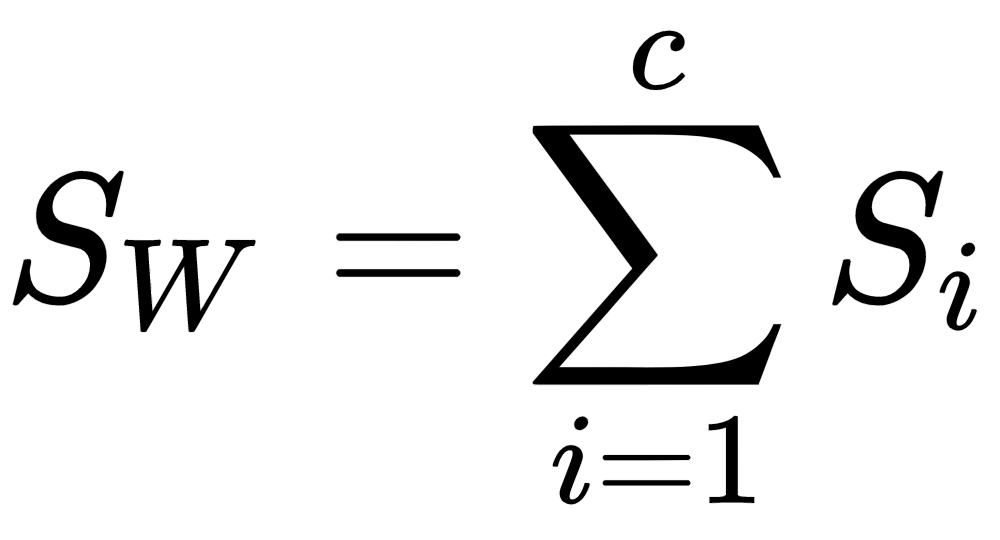

- Where Si defined as: 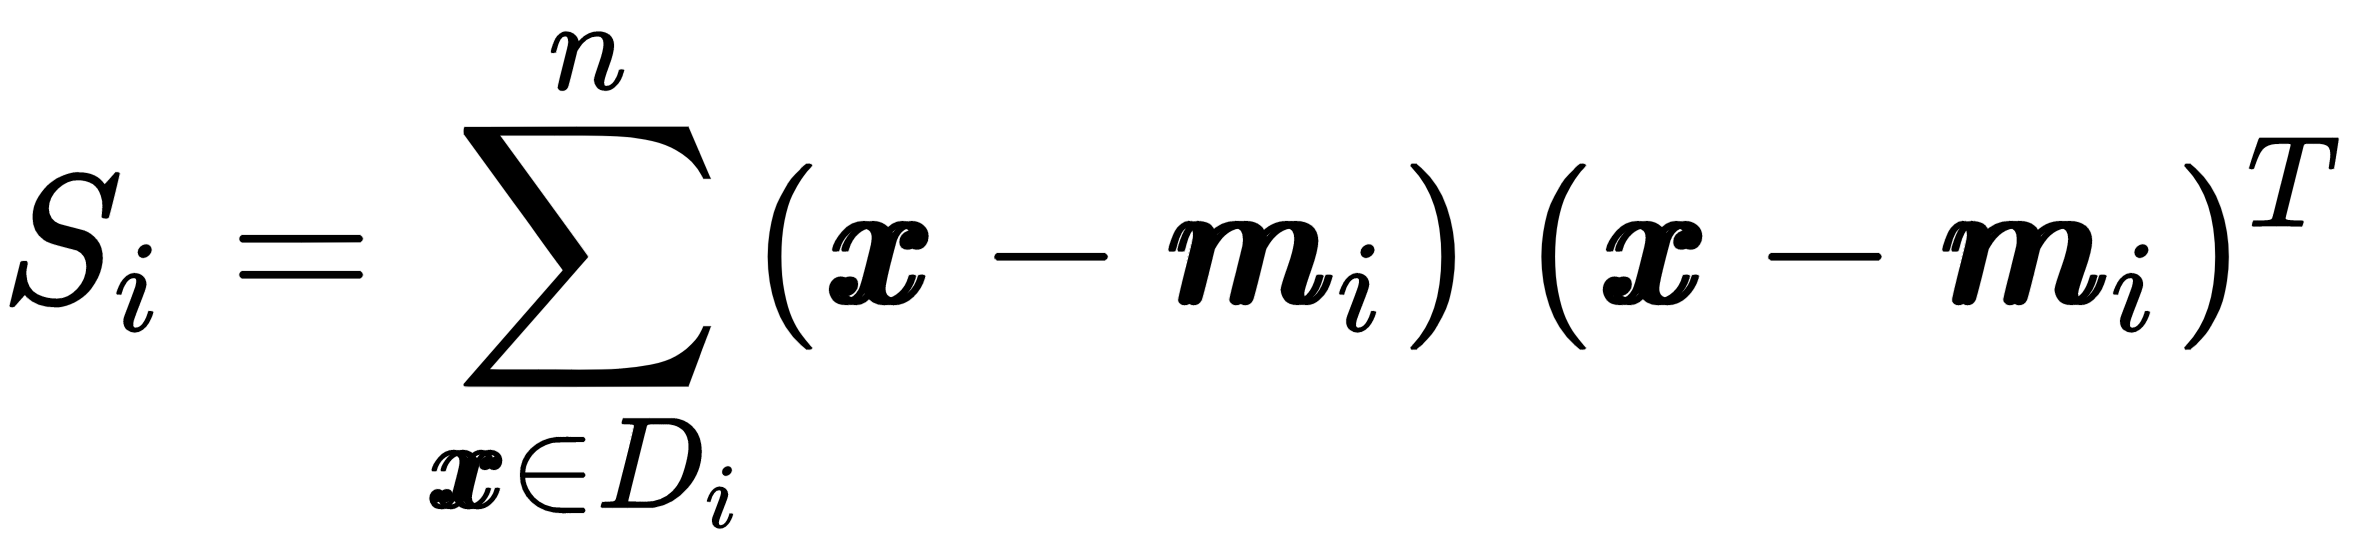
- Here, mi represents the mean vector for the i class, and a between-class scatter matrix defined by the following: 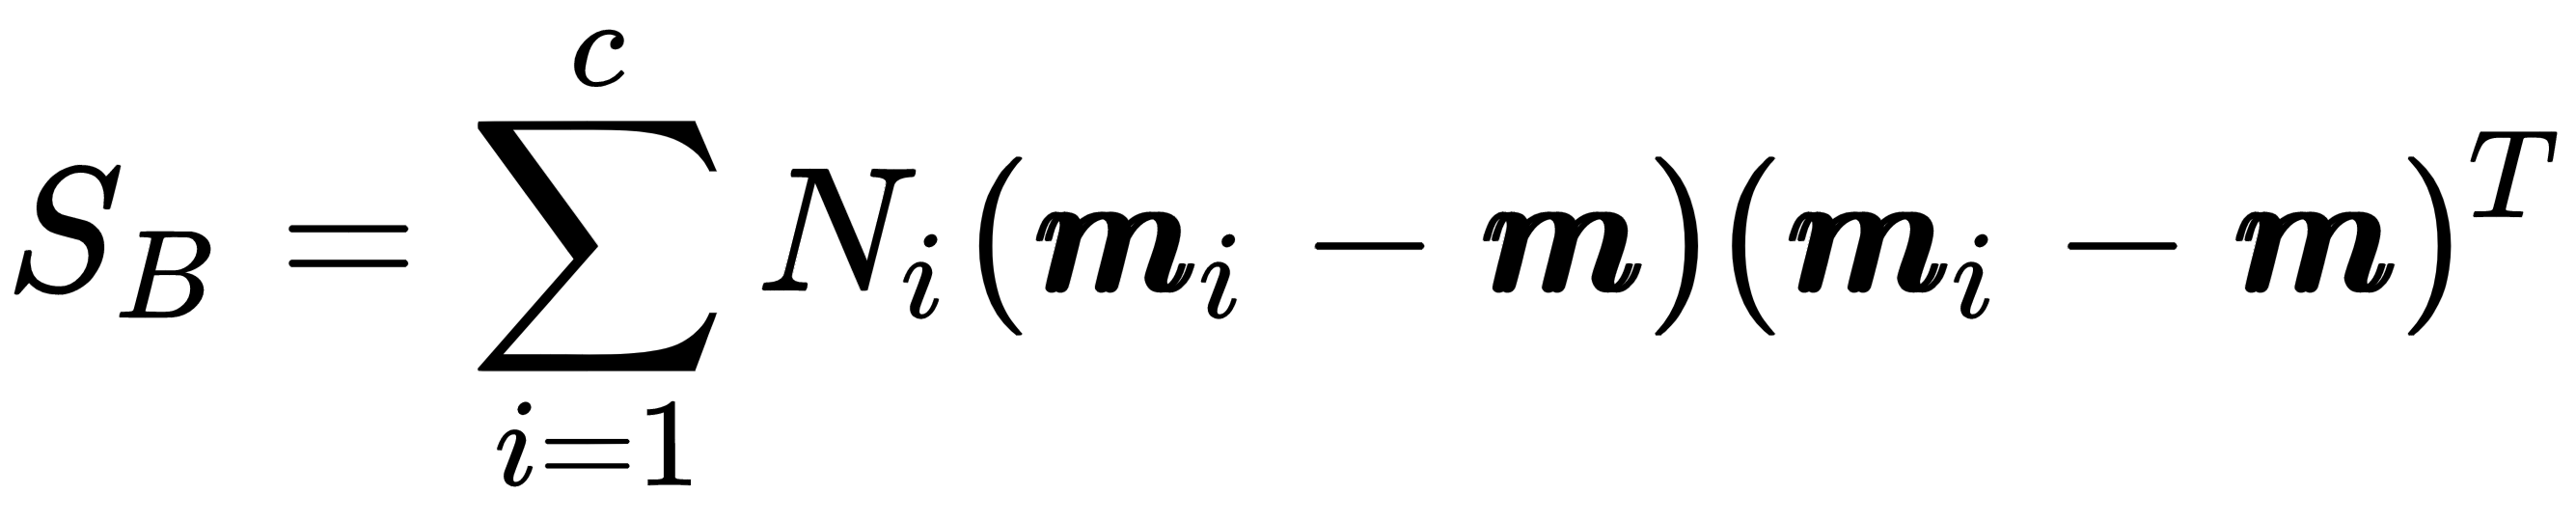
- m is the overall mean of the dataset, mi is the sample mean for each class, and Ni is the sample size for each class (number of observations per class):

In [3]:
# within class scatter matrix
S_W = np.zeros((4, 4))
# to each Iris
for cl, mv in zip([0, 1, 2], mean_vectors):
    # start from 0, each class scatter matrix
    class_sc_mat = np.zeros((4, 4))
    # take sample to each Iris
    for row in iris_X[iris_y == cl]:
        # row vector
        row, mv = row.reshape(4,1), mv.reshape(4,1)
        # 4 * 4 matrix
        class_sc_mat += (row-mv).dot((row-mv).T)
        
    # sum of scatter matrix
    S_W += class_sc_mat

S_W

array([[38.9562, 13.63  , 24.6246,  5.645 ],
       [13.63  , 16.962 ,  8.1208,  4.8084],
       [24.6246,  8.1208, 27.2226,  6.2718],
       [ 5.645 ,  4.8084,  6.2718,  6.1566]])

In [4]:
# between class scatter matrix

# mean value of dataset
overall_mean = np.mean(iris_X, axis=0).reshape(4, 1)

S_B = np.zeros((4, 4))
for i, mean_vec in enumerate(mean_vectors):
    # each Iris data size number
    n = iris_X[iris_y==i, :].shape[0]
    # each Iris mean vector
    mean_vec = mean_vec.reshape(4, 1)
    S_B += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
    
S_B

array([[ 63.21213333, -19.95266667, 165.2484    ,  71.27933333],
       [-19.95266667,  11.34493333, -57.2396    , -22.93266667],
       [165.2484    , -57.2396    , 437.1028    , 186.774     ],
       [ 71.27933333, -22.93266667, 186.774     ,  80.41333333]])

In [5]:
# calculate matrix characteristic value and vector
eig_vals, eig_vecs = np.linalg.eig(np.dot(np.linalg.inv(S_W), S_B))
eig_vecs = eig_vecs.real
eig_vals = eig_vals.real

for i in range(len(eig_vals)):
    eigvec_sc = eig_vecs[:, i]
    print('Eigenvector {}: {}'.format(i+1, eigvec_sc))
    print('Eigenvalue {:} {}'.format(i+1, eig_vals[i]))

Eigenvector 1: [-0.20874182 -0.38620369  0.55401172  0.7073504 ]
Eigenvalue 1 32.191929198278025
Eigenvector 2: [-0.00653196 -0.58661055  0.25256154 -0.76945309]
Eigenvalue 2 0.28539104262306647
Eigenvector 3: [-0.14156417 -0.212536   -0.27030318  0.69269842]
Eigenvalue 3 -2.8907453147977534e-15
Eigenvector 4: [-0.14156417 -0.212536   -0.27030318  0.69269842]
Eigenvalue 4 -2.8907453147977534e-15


Note that the 3rd and 4th eigenvalue is nearly 0, because LDA use to cut boundaries, and Iris dataset only have 3 classes, so we only need 2 boundaries. Usually n classes need n-1 cutting.

In [6]:
# keep the most useful eigenvector
linear_discriminants = eig_vecs.T[:2]
linear_discriminants

array([[-0.20874182, -0.38620369,  0.55401172,  0.7073504 ],
       [-0.00653196, -0.58661055,  0.25256154, -0.76945309]])

In [7]:
# eig_vals divided by the sum of eigenvalues can see the variance explained proportion
eig_vals / eig_vals.sum()

array([ 9.91212605e-01,  8.78739503e-03, -8.90081230e-17, -8.90081230e-17])

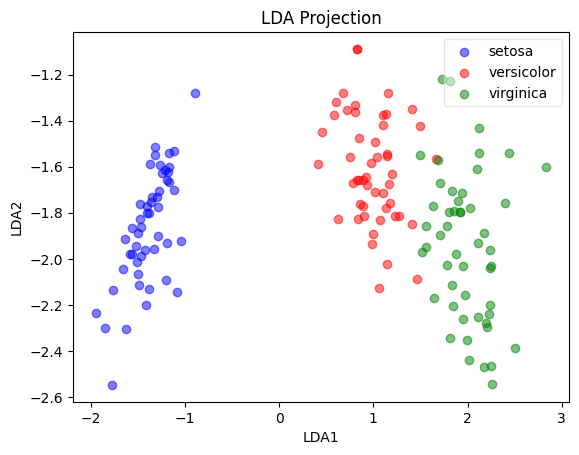

In [8]:
# we project the dataset to new coordination and plot the data
lda_iris_projection = np.dot(iris_X, linear_discriminants.T)
lda_iris_projection[:5,]

plot(lda_iris_projection, iris_y, "LDA Projection", "LDA1", "LDA2")

Scikit learn also has LDA to automate it

PCA is non supervised learning, it don't need reaction variable, LDA required reaction variable to use

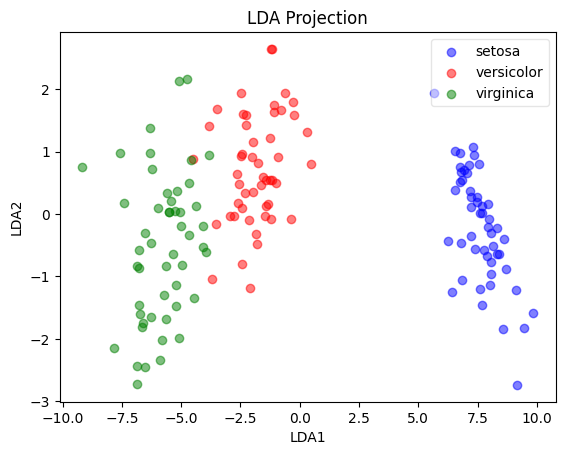

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
# fitting and transform data
X_lda_iris = lda.fit_transform(iris_X, iris_y)
# plotting
plot(X_lda_iris, iris_y, "LDA Projection", "LDA1", "LDA2")

We have mirroring here, but because sign won't affect eigenvector, there is no problem.

In [10]:
# lda scalings_ is same as components_ in PCA
lda.scalings_

array([[ 0.82937764, -0.02410215],
       [ 1.53447307, -2.16452123],
       [-2.20121166,  0.93192121],
       [-2.81046031, -2.83918785]])

In [11]:
# same as manually calculated ratio as above
lda.explained_variance_ratio_

array([0.9912126, 0.0087874])

In [12]:
# same calculating process as manual but with scaling, therefore determinant is different.
for manual_component, sklearn_component in zip(eig_vecs.T[:2], lda.scalings_.T):
    print(sklearn_component / manual_component)

[-3.97322221 -3.97322221 -3.97322221 -3.97322221]
[3.68987776 3.68987776 3.68987776 3.68987776]


We try to fit the scaled Iris data here.

In [13]:
# import our scaling model
from sklearn.preprocessing import StandardScaler

# z scaling, which is centered first, then divide std
X_scaled = StandardScaler().fit_transform(iris_X)

X_lda_iris = lda.fit_transform(X_scaled, iris_y)
lda.scalings_

array([[ 0.68448644, -0.01989153],
       [ 0.66659193, -0.94029176],
       [-3.87282074,  1.63962597],
       [-2.13508598, -2.15691008]])

We will explain LDA scalings_here as PCA components_ as before.

In [14]:
# keep the first 2 characteristics
# remove last 2 component
iris_2_dim = iris_X[:, 2:4]
iris_2_dim_transformed_lda = lda.fit_transform(iris_2_dim, iris_y)

# see the first 5 row of projected data
iris_2_dim_transformed_lda[:5,]

array([[-6.0424185 ,  0.05692487],
       [-6.0424185 ,  0.05692487],
       [-6.19685555,  0.27304711],
       [-5.88798144, -0.15919736],
       [-6.0424185 ,  0.05692487]])

scalings_ now using column as determinant, we need to transform as row

In [15]:
# changing same as PCA, using row as determinant
components = lda.scalings_.T
print(components)

[[ 1.54437053  2.40239438]
 [-2.16122235  5.04259916]]


In [16]:
np.dot(iris_2_dim, components.T)[:5,]

array([[ 2.64259762, -2.01719146],
       [ 2.64259762, -2.01719146],
       [ 2.48816057, -1.80106922],
       [ 2.79703467, -2.23331369],
       [ 2.64259762, -2.01719146]])

Projection is the combination of the original, which means LDA will remove characteristic correlation as PCA. To prove that, we calculate the cutted data with the projection data correlation matrix.

In [17]:
# correlation on original characteristics are large
np.corrcoef(iris_2_dim.T)

array([[1.        , 0.96286543],
       [0.96286543, 1.        ]])

In [18]:
# LDA correlation very small, same as PCA
np.corrcoef(iris_2_dim_transformed_lda.T)

array([[ 1.00000000e+00, -2.82066762e-16],
       [-2.82066762e-16,  1.00000000e+00]])

The right diagonal are always highly correlated, but after LDA projection, other places are nearly independent. Now we also check the scalings_ properties image.

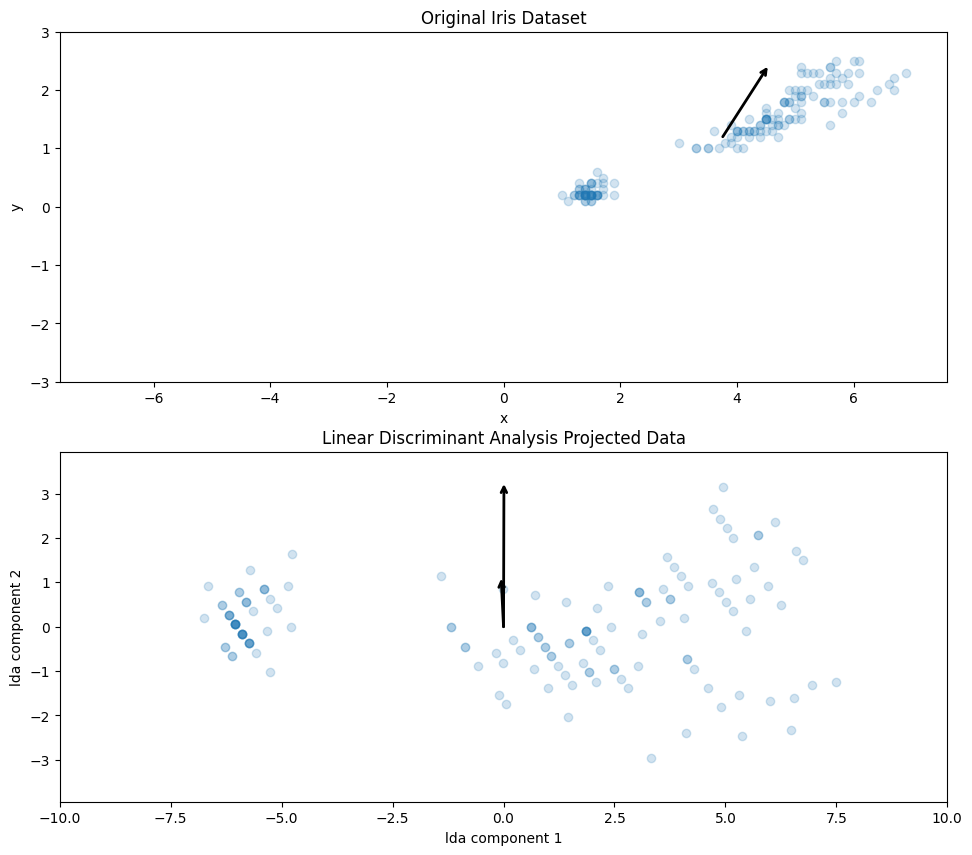

In [20]:
def draw_vector(v0, v1, ax):
    arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

# plotting
ax[0].scatter(iris_2_dim[:, 0], iris_2_dim[:, 1], alpha=0.2)
for length, vector in zip(lda.explained_variance_ratio_, components):
    v = vector * .5
    # lda.xbar equal to pca.mean_
    draw_vector(lda.xbar_, lda.xbar_ + v, ax=ax[0])
ax[0].axis('equal')
ax[0].set(xlabel='x', ylabel='y', title='Original Iris Dataset', xlim=(-3, 3), ylim=(-3, 3))

ax[1].scatter(iris_2_dim_transformed_lda[:, 0], iris_2_dim_transformed_lda[:, 1], alpha=0.2)
for length, vector in zip(lda.explained_variance_ratio_, components):
    transformed_component = lda.transform([vector])[0]
    v = transformed_component * .1
    draw_vector(iris_2_dim_transformed_lda.mean(axis=0), iris_2_dim_transformed_lda.mean(axis=0) + v, ax=ax[1])
    ax[1].axis('equal')
    ax[1].set(xlabel='lda component 1', ylabel='lda component 2', title='Linear Discriminant Analysis Projected Data',
              xlim=(-10, 10), ylim=(-3, 3))

We now try to use both LDA and PCA to preprocess Iris dataset together.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# we use KNN as supervised model, using pipeline to link up KNN model and characteristic transfer tool, then use
# cross_val_score for validation

# create a PCA component
single_pca = PCA(n_components=1)

# create 1 determinant LDA component
single_lda = LinearDiscriminantAnalysis(n_components=1)

# create KNN model
knn = KNeighborsClassifier(n_neighbors=3)

# call KNN to get baseline accuracy to compare other 2 characteristic translation method
knn_average = cross_val_score(knn, iris_X, iris_y).mean()

# baseline accuracy is this
knn_average

0.9666666666666668

In [24]:
# we use LDA to keep the best line determinant
lda_pipeline = Pipeline([('lda', single_lda), ('knn', knn)])
lda_average = cross_val_score(lda_pipeline, iris_X, iris_y).mean()

# better than PCA, but worse than original
lda_average

0.9666666666666666

In [26]:
# check PCA here, we guess PCA won't be better than LDA, because it don't have calss divisibility
pca_pipeline = Pipeline([('pca', single_pca), ('knn', knn)])
pca_average = cross_val_score(pca_pipeline, iris_X, iris_y).mean()
pca_average

0.9

In [27]:
# try to add a LDA with 2 determinant
lda_pipeline = Pipeline([('lda', LinearDiscriminantAnalysis(n_components=2)), ('knn', knn)])
lda_average = cross_val_score(lda_pipeline, iris_X, iris_y).mean()

# same as before
lda_average

0.9733333333333334

In [29]:
# use SelectKBest to see whether it can let LDA improve
from sklearn.feature_selection import SelectKBest
# try all k value, but not including keep all
for k in [1, 2, 3]:
    # create pipeline
    select_pipeline = Pipeline([('select', SelectKBest(k=k)), ('knn', knn)])
    # cross validation pipeline
    select_average = cross_val_score(select_pipeline, iris_X, iris_y).mean()
    print(k, "best feature has accuracy:", select_average)

1 best feature has accuracy: 0.9400000000000001
2 best feature has accuracy: 0.9533333333333334
3 best feature has accuracy: 0.9733333333333334


In real life, using both supervised and non supervised characteristic translate are common. Now we use a GridSearch, finding the best parameters for the things below:

- PCA main component
- LDA discriminant
- KNN neighbor

In [30]:
# the function below input a model, a dictionary like parameter grid, x and y dataset, then it will output gridSearch result
# it will output accuracy, best parameter, fitting time and predicting time

def get_best_model_and_accuracy(model, params, X, y):
    grid = GridSearchCV(model, params, error_score=0.)
    grid.fit(X, y)
    print("Best Accuracy: {}".format(grid.best_score_))
    print("Best Parameters: {}".format(grid.best_params_))
    # print fitting time
    print("Average Time to Fit (s): {}".format(round(grid.cv_results_['mean_fit_time'].mean(), 3)))
    # print predict time
    print("Average Time to Score (s): {}".format(round(grid.cv_results_['mean_score_time'].mean(), 3)))

In [52]:
# now we can use scale, PCA, LDA, KNN for testing
from sklearn.model_selection import GridSearchCV
iris_params = {
    'preprocessing__scale__with_std': [True, False],
    'preprocessing__scale__with_mean': [True, False],
    'preprocessing__pca__n_components':[1, 2, 3, 4],
    
    # According to scikit learn document, LDA largest n_components is classes -1.
    'preprocessing__lda__n_components': [1, 2],
    'clf__n_neighbors': range(1, 9)
}

preprocessing = Pipeline([('scale', StandardScaler()),
                          ('pca', PCA()),
                          ('lda', LinearDiscriminantAnalysis())])

iris_pipeline = Pipeline(steps=[('preprocessing', preprocessing), ('clf', KNeighborsClassifier())])

get_best_model_and_accuracy(iris_pipeline, iris_params, iris_X, iris_y)

Best Accuracy: 0.9933333333333334
Best Parameters: {'clf__n_neighbors': 8, 'preprocessing__lda__n_components': 1, 'preprocessing__pca__n_components': 3, 'preprocessing__scale__with_mean': True, 'preprocessing__scale__with_std': False}
Average Time to Fit (s): 0.003
Average Time to Score (s): 0.003


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
160 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to 0.0.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py", line 401, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/pipeline.py", line 359, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "/opt/conda/lib/python3.10/site

Usually best model are composed of many characteristic tools. Although PCA and LDA are powerful, they are both linear translation, everything input are expected to be linear. If data are not suitable for PCA or LDA, such as data with non linear characteristic, e.g Circle, then we cannot use GridSearch to find the parameters.